In [2]:
using HDF5
using Gadfly
using Compose
using Colors

In [24]:
fid=h5open("diagonalization_strain.h5","r")

HDF5 data file: diagonalization_strain.h5

In [25]:
names(fid)

1-element Array{ByteString,1}:
 "50"

In [27]:
h=fid["50/6/0.001"]
names(h)

14-element Array{ByteString,1}:
 "Bondaryb"
 "Bondaryw"
 "Bondsb"  
 "Bondsw"  
 "E"       
 "S"       
 "U"       
 "V"       
 "Xb"      
 "Xw"      
 "heights" 
 "i0b"     
 "i0w"     
 "omega"   

In [28]:
N=7500;
Xb=read(h["Xb"]);
Xw=read(h["Xw"]);
E=read(h["E"]);
S=read(h["S"]);
U=read(h["U"]);
V=read(h["V"]);
Bondsb=read(h["Bondsb"]);
i0b=read(h["i0b"]);
omega=read(h["omega"]);
heights=read(h["heights"]);

In [29]:
base03=parse(Colorant,"#002b36");
base02=parse(Colorant,"#073642");
base01=parse(Colorant,"#586e75");
base00=parse(Colorant,"#657b83");
base0=parse(Colorant,"#839496");
base1=parse(Colorant,"#839496");
base2=parse(Colorant,"#eee8d5");
base3=parse(Colorant,"#fdf6e3");

yellow=parse(Colorant,"#b58900");
orange=parse(Colorant,"#cb4b16");
red=parse(Colorant,"#dc322f");
magenta=parse(Colorant,"#d33682");
violet=parse(Colorant,"#6c71c4");
blue=parse(Colorant,"#268bd2");
cyan=parse(Colorant,"#3aa198");
green=parse(Colorant,"#859900");

In [9]:
N=7500;
t=Theme(highlight_width=0pt,default_point_size=.75pt,background_color=base03,
    grid_color=base2,minor_label_color=base2,key_label_color=base2,
    key_title_color=cyan,major_label_color=cyan,
bar_highlight=red
);

lx=Guide.xlabel("x");
ly=Guide.ylabel("y");

dsc=Scale.ContinuousColorScale(Scale.lab_gradient(red,base00,yellow));
sc=Scale.ContinuousColorScale(Scale.lab_gradient(magenta,violet,blue,cyan,green));

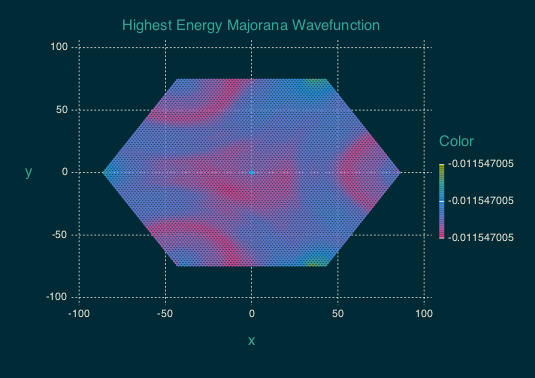

In [55]:
state=1;
bsites=layer(x=Xb[:,1],y=Xb[:,2],color=V[:,state],Geom.point,t)
wsites=layer(x=Xw[:,1],y=Xw[:,2],color=U[:,state],Geom.point,t)
midb=[round(Int,N/2-74),round(Int,N/2+25),round(Int,N/2+26)]
midw=[round(Int,N/2-25),round(Int,N/2-24),round(Int,N/2+75)]
midplotb=layer(x=Xb[midb,1],y=Xb[midb,2],Geom.point)
midplotw=layer(x=Xw[midw,1],y=Xw[midw,2],Geom.point)
plot(midplotb,midplotw,bsites,wsites,sc,t,lx,ly,Guide.title("Highest Energy Majorana Wavefunction"))

In [ ]:
state=2;
bsites=layer(x=Xb[:,1],y=Xb[:,2],color=V[:,state],Geom.point,t)
wsites=layer(x=Xw[:,1],y=Xw[:,2],color=U[:,state],Geom.point,t)
plot(bsites,wsites,sc,t,lx,ly,Guide.title("Next to Highest Energy Majorana Wavefunction"))

In [ ]:
bsites=layer(x=Xb[:,1],y=Xb[:,2],color=V[:,3000],Geom.point,t)
wsites=layer(x=Xw[:,1],y=Xw[:,2],color=U[:,3000],Geom.point,t)
plot(bsites,wsites,sc,t)

In [ ]:
bsites=layer(x=Xb[:,1],y=Xb[:,2],color=V[:,4000],Geom.point,t)
wsites=layer(x=Xw[:,1],y=Xw[:,2],color=U[:,4000],Geom.point,t)
plot(bsites,wsites,sc,t)

In [ ]:
bsites=layer(x=Xb[:,1],y=Xb[:,2],color=V[:,7000],Geom.point,t)
wsites=layer(x=Xw[:,1],y=Xw[:,2],color=U[:,7000],Geom.point,t)
plot(bsites,wsites,sc,t)

In [ ]:
bsites=layer(x=Xb[:,1],y=Xb[:,2],color=log(abs(V[:,7000])),Geom.point,t)
wsites=layer(x=Xw[:,1],y=Xw[:,2],color=log(abs(U[:,7000])),Geom.point,t)
plot(bsites,wsites,sc,t)

In [ ]:
bsites=layer(x=Xb[:,1],y=Xb[:,2],color=V[:,7000],Geom.point,t)
wsites=layer(x=Xw[:,1],y=Xw[:,2],color=U[:,7000],Geom.point,t)
plot(bsites,wsites,sc,t)

In [ ]:
hsy=(1+sin(pi/6))
hsx=3*cos(pi/6);
sp=[80,20];
ep=[45,60];
w=2;
spx=75;
spy=20;
epx=spx-15*hsy;
epy=spy+15*hsx;

In [ ]:
at1=Guide.annotation(compose(context(),
polygon([(epx+w*hsx,epy+w*hsy),(epx-w*hsx,epy-w*hsy),
    (spx-w*hsx,spy-w*hsy),(spx+w*hsx,spy+w*hsy)]),
stroke(yellow),fill(nothing),linewidth(2pt)
));

at2=Guide.annotation(compose(context(),
polygon([(-epx-w*hsx,epy+w*hsy),(-epx+w*hsx,epy-w*hsy),
    (-spx+w*hsx,spy-w*hsy),(-spx-w*hsx,spy+w*hsy)]),stroke(yellow),fill(nothing)
));

at3=Guide.annotation(compose(context(),
polygon([(epx+w*hsx,-epy-w*hsy),(epx-w*hsx,-epy+w*hsy),
    (spx-w*hsx,-spy+w*hsy),(spx+w*hsx,-spy-w*hsy)]),stroke(yellow),fill(nothing)
));
at4=Guide.annotation(compose(context(),
polygon([(-epx-w*hsx,-epy-w*hsy),(-epx+w*hsx,-epy+w*hsy),
    (-spx+w*hsx,-spy+w*hsy),(-spx-w*hsx,-spy-w*hsy)]),stroke(yellow),fill(nothing)
));

text1=Guide.annotation(compose(context(),
text(75,40,"Edge Mode"),stroke(nothing),fill(yellow),linewidth(5pt)
));

arrow1=Guide.annotation(compose(context(),
line([(80,33),(65,40)]),stroke(yellow),fill(yellow),linewidth(2pt),
line([(67,36),(65,40)]),stroke(yellow),fill(yellow),
line([(68,41),(65,40)]),stroke(yellow),fill(yellow)
));

In [ ]:
tp=Theme(highlight_width=0pt,default_point_size=1pt,background_color=base03,
    grid_color=base2,minor_label_color=base2,key_label_color=base2,
    key_title_color=cyan,major_label_color=cyan
);
tpp=Theme(highlight_width=0pt,default_point_size=3pt,background_color=base03,
    grid_color=base2,minor_label_color=base2,key_label_color=base2,
    key_title_color=cyan,major_label_color=cyan
);

In [ ]:
bsites=layer(x=Xb[:,1],y=Xb[:,2],color=V[:,end],Geom.point,tpp)
wsites=layer(x=Xw[:,1],y=Xw[:,2],color=U[:,end],Geom.point,tpp)

p=plot(bsites,at1,text1,arrow1,sc,lx,ly,
Guide.title("Black sites on 1 of 2 Majorana Ground States"),
Coord.Cartesian(ymin=-30,ymax=90,xmin=20,xmax=90),tpp)
draw(SVG("edgemode_noflux.svg", 6inch, 6inch), p)

In [ ]:
bsites=layer(x=Xb[:,1],y=Xb[:,2],color=log(abs(V[:,end])),Geom.point,tpp)
wsites=layer(x=Xw[:,1],y=Xw[:,2],color=log(abs(U[:,end])),Geom.point,tpp)

p=plot(bsites,sc,lx,ly,
Guide.title("Black sites on 1 of 2 Majorana Ground States"),tp,Guide.colorkey("log(abs())"))
#Coord.Cartesian(ymin=-30,ymax=90,xmin=20,xmax=90),tp)
draw(SVG("edgemode_noflux_log.svg", 6inch, 6inch), p)

In [ ]:
p=plot(wsites,sc,lx,ly,
Guide.title("White sites on 1 of 2 Majorana Ground States"),tp,Guide.colorkey("log(abs())"))
#Coord.Cartesian(ymin=-30,ymax=90,xmin=20,xmax=90),tp)
draw(SVG("edgemode_noflux_log2.svg", 6inch, 6inch), p)

In [ ]:
plot(wsites,at3,at4,sc,lx,ly,
Guide.title("White sites on 1 of 2 Majorana Ground States"),tp)

In [ ]:
bsites=layer(x=Xb[:,1],y=Xb[:,2],color=log(abs(V[:,end-1])),Geom.point,tpp)
wsites=layer(x=Xw[:,1],y=Xw[:,2],color=log(abs(U[:,end-1])),Geom.point,tpp)
plot(bsites,sc,lx,ly,
Guide.title("Black sites on 2 of 2 Majorana Ground States"),tpp)

In [ ]:
plot(wsites,sc,lx,ly,
Guide.title("Whites sites on 2 of 2 Majorana Ground States"),tpp)

In [ ]:
E[end]- E[end-1]

In [ ]:
close(fid)

In [ ]:
sum(E)

In [ ]:
  site=round(Int,N/2);
  n=150;
  omega=collect(linspace(0,6,150));
  heights=zeros(omega);

  for  e in 1:N;
    k=round(Int,ceil(E[e]*50));
    heights[k]+=.5*U[site,e].^2
  end

In [ ]:
t2=Theme(highlight_width=0pt,default_point_size=.75pt,background_color=base03,
    grid_color=base2,minor_label_color=base2,key_label_color=base2,
    key_title_color=cyan,major_label_color=cyan,
major_label_font_size=15pt, minor_label_font_size=10pt,
key_position=:none, panel_opacity=0
);

xl=Guide.xlabel("ω")
yl=Guide.ylabel("LDOS(ω)")
tl=Guide.title("Zero flux, Undistorted LDOS")
xs=Coord.Cartesian(xmin=0,xmax=6)

p=plot(x=omega,y=heights,color=zeros(length(omega)),xs,Geom.bar,xl,yl,tl,t2,Scale.color_discrete_manual(blue))
draw(SVG("hist_noflux.svg", 6inch, 6inch), p)

In [14]:
midb=[round(Int,N/2-74),round(Int,N/2+25),round(Int,N/2+26)]
midw=[round(Int,N/2-25),round(Int,N/2-24),round(Int,N/2+75)]

omega=collect(linspace(0,6,150));
heights=zeros(omega);
n=150;

for i in 1:3
    siteb=midb[i];
    sitew=midw[i];
    
    for  e in 1:N;
        k=round(Int,ceil(E[e]*50));
        heights[k]+=.5*U[sitew,e].^2;
        heights[k]+=.5*V[siteb,e].^2;
    end
end
heights=heights/6;

In [30]:
omega=collect(linspace(0,6,150));
heights=zeros(omega);
n=150;
    
for  e in 1:N;
    k=round(Int,ceil(E[e]*50));
    heights[k]+=.5*U[round(Int,N/2-25),e].^2;
end

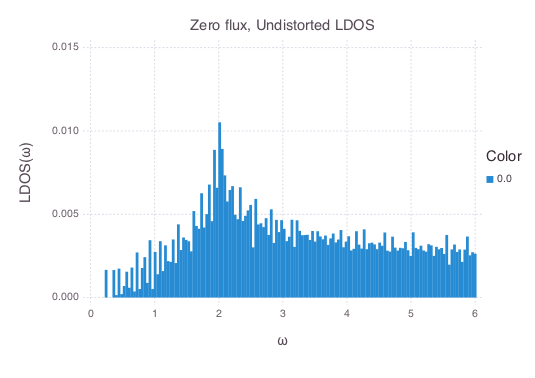

In [31]:
xl=Guide.xlabel("ω")
yl=Guide.ylabel("LDOS(ω)")
tl=Guide.title("Zero flux, Undistorted LDOS")
xs=Coord.Cartesian(xmin=0,xmax=6)

plot(x=omega,y=heights,color=zeros(length(omega)),xs,Geom.bar,
xl,yl,tl,Scale.color_discrete_manual(blue))
#draw(SVG("hist_noflux.svg",6inch,6inch),p)

In [64]:
htheirs=[185,164,262,
    158,316,285,204,
    275,387,215,
    308,346,358,
    359,406,414,
    402,475,431,444,471]*.005/506;

In [65]:
#plot(y=htheirs,Geom.bar)

In [23]:
close(fid)